In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Path = "/content/drive/My Drive/Cryptowork"

In [ ]:
pip install pycryptodome

     |████████████████████████████████| 1.9MB 4.9MB/s 


In [ ]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad

import os
import os.path

import base64
from base64 import b64decode
from base64 import decodestring

from PIL import Image
import cv2

import io
from io import BytesIO, StringIO

# SYMMETRIC ENCRYPTION

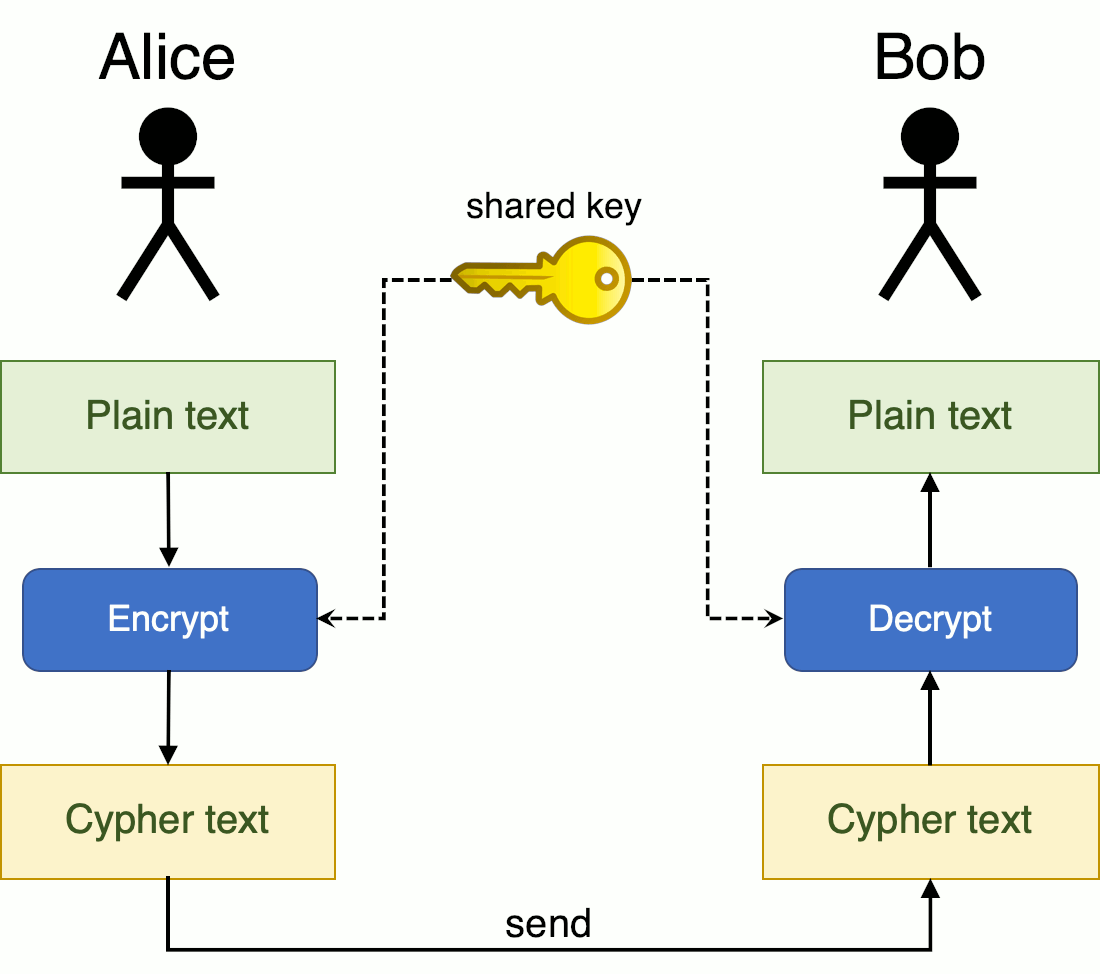

In [ ]:
symetric = Image.open("/content/drive/My Drive/Cryptowork/symmetric.png")
symetric

# DATA PREPARATION

In [ ]:
#gerando as 2 chaves simétricas

KEY1 = get_random_bytes(16)  #blocos de 16 bytes = 128 bits
KEY2 = get_random_bytes(32)  #blocos de 32 bytes = 256 bits

#vetor de inicialização
IV = get_random_bytes(16)    #128 bits

In [ ]:
print(KEY1)
print(KEY2)
print(IV)

b'x\xa8G\x0f\xee\x9fc\x07\xd5\xce\xb9\xda\xfa\xfdp\xec'
b'\xde\x1d\xcc\xab\x8b\x8a\xedY\xafs\x020\xbdZ>E\x1ah$\xe7\xa0\x06tY\x05\x85\x8e\x8f\xeel\xb8\x8b'
b'"p\xf2\xb0IfHKw\xcc\xa4/\x07\xcd\x00d'


In [ ]:
#modos de operação para blocos simétricos

Mode1 = AES.MODE_ECB        #Electronic CodeBook   
Mode2 = AES.MODE_CBC        #Ciphertext Block Chaining

In [ ]:
#Carregando a imagem e convertendo para base64

with open("/content/drive/My Drive/Cryptowork/teste2.jpg", "rb") as image2string:
    converted_string = base64.b64encode(image2string.read())
print(converted_string [:200])
  
with open('encode.bin', "wb") as file:
    file.write(converted_string)

b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e'


In [ ]:
#data = IMG_STR
data1 = converted_string

# ENCRYPTING

**ECB e CBC com 128/256**

In [ ]:
#MODO1 = ECB COM 128 E 256
cipher1 = AES.new(KEY1, Mode1)
cipher2 = AES.new(KEY2, Mode1)

In [ ]:
#MODO2 = CBC COM 128 E 256
cipher3 = AES.new(KEY1, Mode2, IV)
cipher4 = AES.new(KEY2, Mode2, IV)

In [ ]:
#encriptando o texto e armazenando na variável

#ECB
ENC_txt1 = cipher1.encrypt(pad (data1, 16))
ENC_txt2 = cipher2.encrypt(pad (data1, 32))

#CBC
ENC_txt3 = cipher3.encrypt(pad (data1, 16))
ENC_txt4 = cipher4.encrypt(pad (data1, 32))

In [ ]:
print(ENC_txt1 [:100])
print(ENC_txt2 [:100])
print(ENC_txt3 [:100])
print(ENC_txt4 [:100])

b'K\x92\x0c\x0e\xa1\xe3:\xc1\xc1\xc6\xf6\xddI\x02z\x15\xf0\x80\xc5Xx\xbc\xb4z(i8=\xfeW\xa6\xb6\xf2\t\x9c\xbf\xa00FCTUcBL\xc6y\x9d~u\xed;G\xb6+\xda[\xb3Q\x0c\xb7B\tF5\xac\xf3&*Z9\xd5\xbc2\x8d\xea\xa8\xc4)Y\x13\xb5R\x07\xd5~:\x97\x0cg\xba\x1d\xb7In~\xb2\x1e\x13E'
b"\xe4q\x0cE0\xb3\xb6\xf9c\xbd:>\xf8\x80\xa4\xa5\x8e\xe6\xd0p\xed\tGU\x1a\xedR\xd0\xd7\xb6:jb\x17\xc7\xc2\xf7\xa1\xd0\xe28\x071'\x7f+}\xd0\xad\xc9l\xa6OW\x87\xc3\xa7\xf6F\xd5\xd7->N\x97c\xb4\x92\x0f/\xd1\xe0\x04\xad\xb4Xz$\x8c\xb1\xf7\x02\x0e\xc9$iB>O\x0ce\xda\x1b\t\xba]@\xe7\xb45"
b'\x00\xe0\xda`\xc7\x84?\xc0\xa3\xbf\x1d\xa8\xe2\x05r\x04?=Dt\xdd\xa4\xd3nU\xc2\xc96\x87\xafg$ne~\xef2g\r\xdf\x00\xff\x91\xd63\x9e-\x1b:\x86\x1a3\xf9\xaaZ<O\x8a\xa2\x15\xc6\xe1\xab\xa2c\xc9\xa2|pil\xd9\xe1\x85\xc3hV\x16s\xe7.\x07\xbb\x0e\xc5\xdc$\x15\x1e\xe1Ht%\x93\xee\xc22{\x18\xd0'
b"\x96X\x90x\xb6\xe3Q\xd7S_\x03\xf6\xec\xfa\xad\xa1-~\x99K\xf9\x83r\xb9\x94\xe9\xbd\xaf\xa8\rS\xb5ma0\xd47\xa45\x88H\xaeV\xff\x00\x7f4\xe8\xc6\xfb\xa4\x0e\x92O\xab\x88\xe

#DECRYPTING

In [ ]:
#ECB
c1 = AES.new(KEY1, Mode1)
c2 = AES.new(KEY2, Mode1)

#CBC
c3 = AES.new(KEY1, Mode2, IV)
c4 = AES.new(KEY2, Mode2, IV)

In [ ]:
#ECB
DEC_txt1 = unpad(c1.decrypt(ENC_txt1), 16)
DEC_txt2 = unpad(c2.decrypt(ENC_txt2), 32)

#CBC
DEC_txt3 = unpad(c3.decrypt(ENC_txt3), 16)
DEC_txt4 = unpad(c4.decrypt(ENC_txt4), 32)

In [ ]:
print(DEC_txt1[:200])
print(DEC_txt2[:200])
print(DEC_txt3[:200])
print(DEC_txt4[:200])

b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e'
b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e'
b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e'
b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/2wBDAQUFBQcGBw4ICA4eFBEUHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4e'


# RESULTS

In [ ]:
#Salvando os resultados
with open("/content/drive/My Drive/Cryptowork/ECB128.jpg", "wb") as f:
    f.write(base64.decodebytes(DEC_txt1))

with open("/content/drive/My Drive/Cryptowork/ECB256.jpg", "wb") as f:
    f.write(base64.decodebytes(DEC_txt2))

with open("/content/drive/My Drive/Cryptowork/CBC128.jpg", "wb") as f:
    f.write(base64.decodebytes(DEC_txt3))

with open("/content/drive/My Drive/Cryptowork/CBC256.jpg", "wb") as f:
    f.write(base64.decodebytes(DEC_txt4))

In [ ]:
#Exibindo 2 dos 4 arquivos decriptados
im1 = Image.open("/content/drive/My Drive/Cryptowork/ECB128.jpg")
im2 = Image.open("/content/drive/My Drive/Cryptowork/CBC256.jpg")

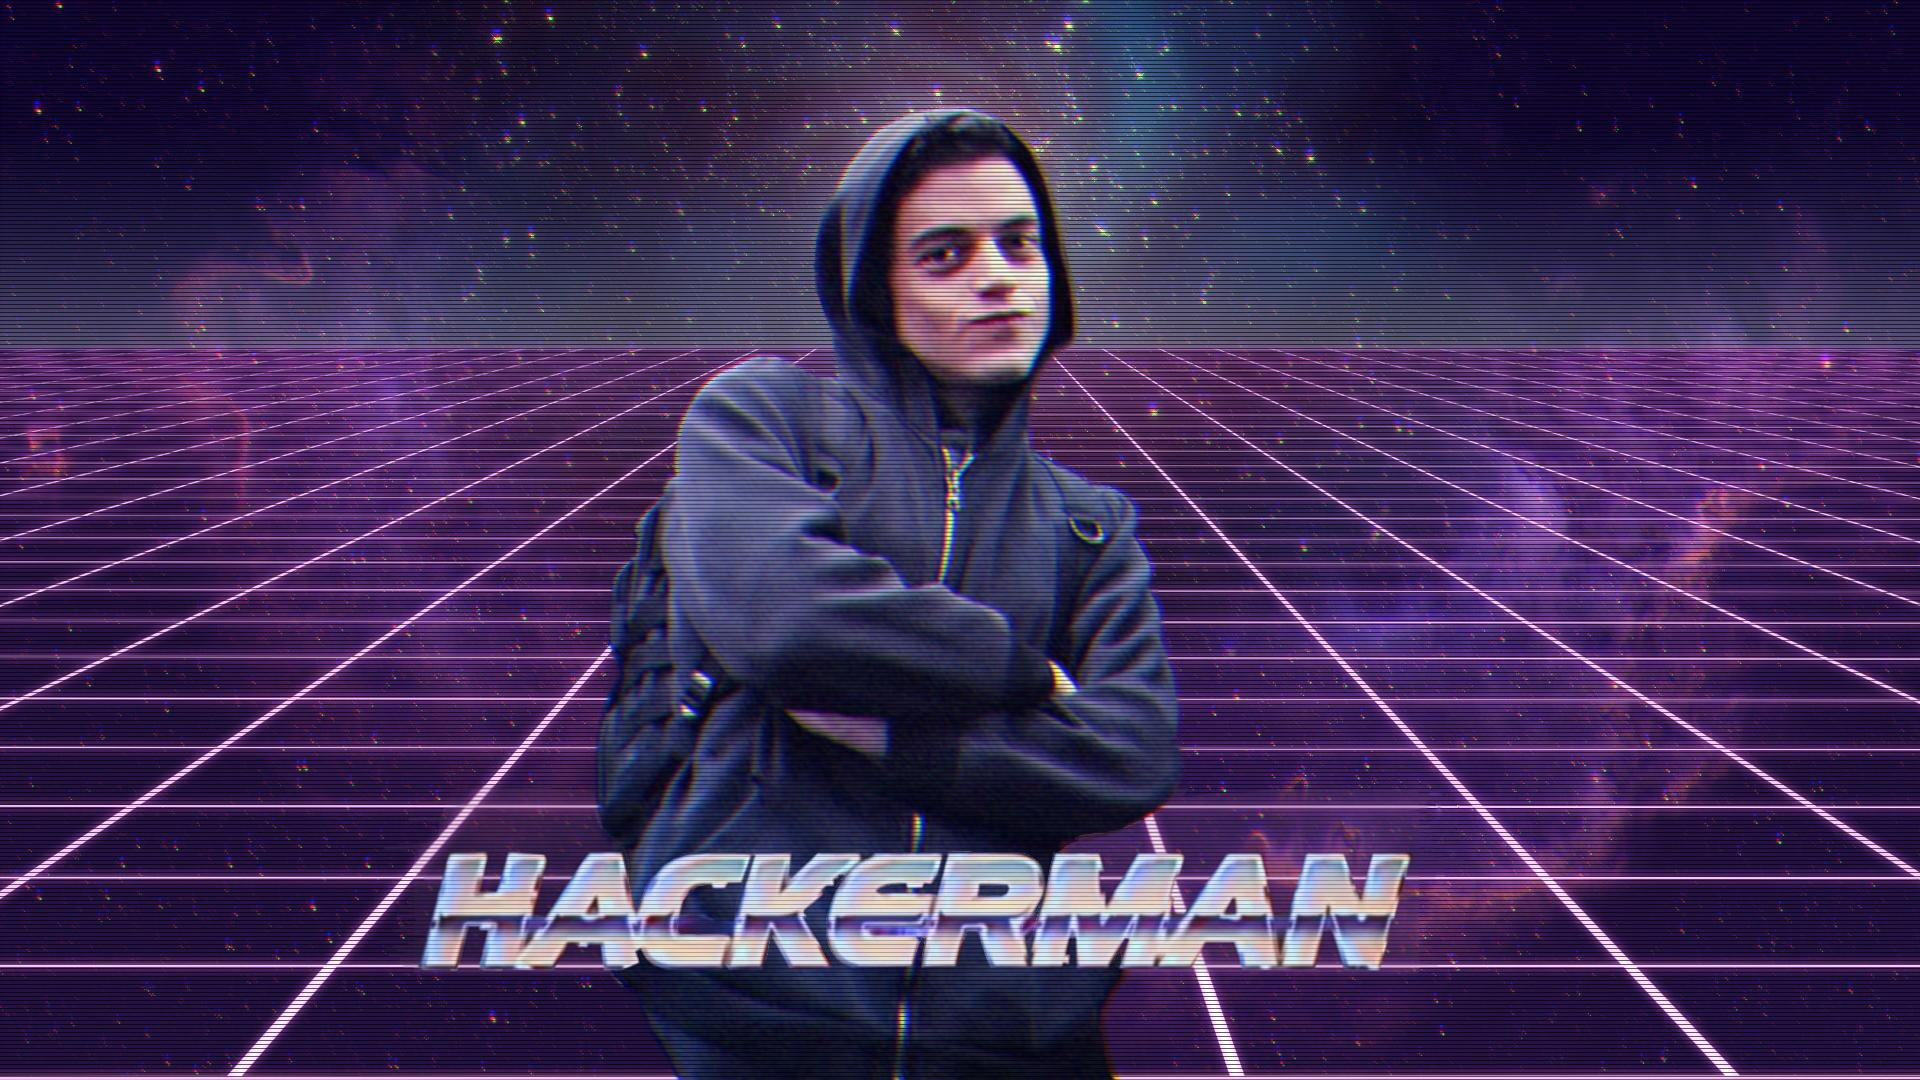

In [ ]:
im1